In [25]:
library(tidyverse)
library("ggdark")
library("ggsci")
library("latex2exp")
library(repr)
source("../scripts/assembly-map.r")

# Change plot size to 4 x 3
#options(repr.plot.width=10, repr.plot.height=8)

In [26]:
example_file = "../data/raw_line_reactor/5.0_1000.0_1.0_10.0_.csv"

parse_fname <- function(fname){
    substrings = str_split(fname, "_")[[1]]
    print(substrings)
    return(list(reactors = as.numeric(str_split(substrings[3], "/")[[1]][2]),
                outflow = as.numeric(substrings[5]), 
                forward = as.numeric(substrings[6]) ))
    }

parse_fname(example_file)

[1] "../data/raw" "line"        "reactor/5.0" "1000.0"      "1.0"        
[6] "10.0"        ".csv"       


$reactors
[1] 5

$outflow
[1] 1

$forward
[1] 10

In [27]:
example_run = read.csv(example_file)

In [28]:
head(example_run)
averages_data = example_run %>% 
    filter(variable %in% c("molecule_count")) %>%
    filter(time < 30)
head(averages_data)

,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5,5,molecule_count,98.00000
2,5,5,var_length,54.40017
3,5,5,5,7.00000
4,5,5,16,5.00000
5,5,5,20,3.00000
6,5,5,72,1.00000


,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5.000,5,molecule_count,98
2,29.001,5,molecule_count,121
3,6.000,5,molecule_count,104
4,4.000,5,molecule_count,102
5,28.000,5,molecule_count,109
6,23.000,5,molecule_count,118


In [39]:
averages_data = example_run %>% 
    filter(variable %in% c("average_length")) %>%
    filter(time < 30)
head(averages_data)

,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5.000,5,average_length,7.306122
2,29.001,5,average_length,7.280992
3,6.000,5,average_length,7.423077
4,4.000,5,average_length,7.617647
5,28.000,5,average_length,9.889908
6,23.000,5,average_length,7.779661


Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 4 row(s) containing missing values (geom_path)."


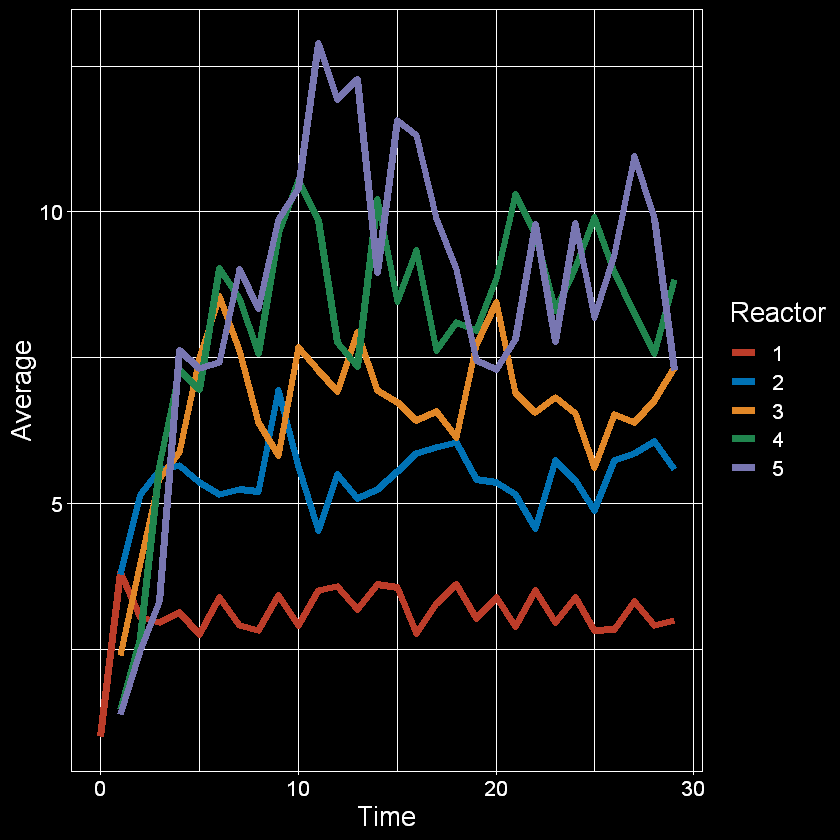

In [42]:
time_series_plot <- ggplot(averages_data) + 
                        geom_line(aes(x = time, 
                                      y = value, 
                                      group = reactor, 
                                      color = as.factor(reactor)), 
                                      size = 2) +
                        dark_theme_linedraw() +
                        theme(text = element_text(size=16), 
                             ) + 
                        labs(x = "Time", y = "Average", color = "Reactor") +
                        scale_color_nejm()

time_series_plot
ggsave("Distributed-5-chain_mean_Presentation.svg", w = 89, h = 89, units = 'mm')

In [43]:
averages_data = example_run %>% 
    filter(variable %in% c("var_length")) %>%
    filter(time < 30)
head(averages_data)

,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5.000,5,var_length,54.40017
2,29.001,5,var_length,87.47039
3,6.000,5,var_length,99.10082
4,4.000,5,var_length,131.64444
5,28.000,5,var_length,269.26555
6,23.000,5,var_length,151.66044


Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 4 row(s) containing missing values (geom_path)."


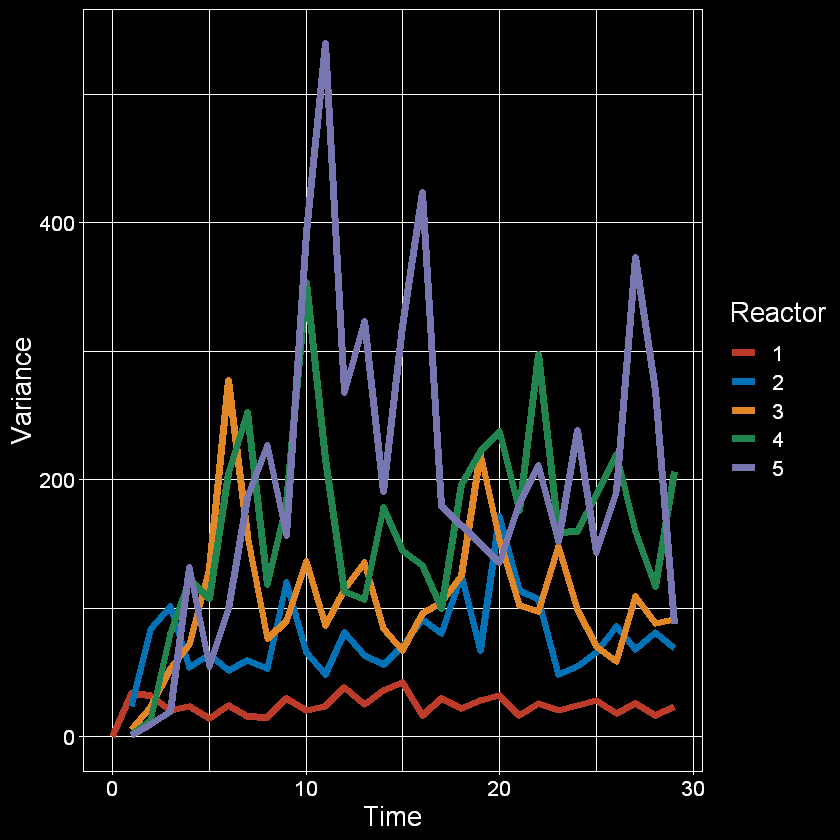

In [47]:
ave_plot <- ggplot(averages_data) + 
                        geom_line(aes(x = time, 
                                      y = value, 
                                      group = reactor, 
                                      color = as.factor(reactor)), 
                                      size = 2) +
                        dark_theme_linedraw() +
                        theme(text = element_text(size=16), 
                             ) + 
                        labs(x = "Time", y = "Variance", color = "Reactor") +
                        scale_color_nejm()

ave_plot
ggsave("Distributed-5-chain_var_Presentation.jpeg", w = 89, h = 89, units = 'mm')

,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5,5,molecule_count,98.00000
2,5,5,var_length,54.40017
3,5,5,5,7.00000
4,5,5,16,5.00000
5,5,5,20,3.00000
6,5,5,72,1.00000


In [31]:
complete_timeseries_df <- example_run %>% filter(!variable %in% c("molecule_count", "var_length", "average_length"))  

In [32]:
complete_timeseries_df["AI"] <- assembly_index(as.numeric(complete_timeseries_df$variable))

In [33]:
reduced_time <- complete_timeseries_df %>%
                    group_by(AI, reactor, time) %>% 
                    summarise(total = sum(value))

`summarise()` has grouped output by 'AI', 'reactor'. You can override using the `.groups` argument.



In [34]:
time_ave <- reduced_time %>% 
                group_by(AI, reactor) %>% 
                summarise(ave = mean(total), 
                          std = sqrt(var(total))) 

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.



In [36]:
distributed_distribution_plot <- ggplot(time_ave) + 
                                    geom_col(aes(x = AI, y = ave, fill = as.factor(reactor)), position = "dodge2") +
                                    dark_theme_linedraw() +
                                    theme(text = element_text(size=16), 
                                                             ) +
                                    facet_wrap(~reactor) + 
                                    labs(x = "Assembly Index", y = "Count", fill = "Reactor") +
                                    scale_fill_nejm()

ggsave("Distributed-5-chain_distribution_Presentation.jpeg", w = 183, h = 247/2, units = 'mm')